#  <font color='red'> Estatística Frequências e Medidas</font>

## **Desafio Final**



<img src="https://womakerscode.org/wp-content/uploads/2023/07/cover-front.jpg" height="200" style="display: block; margin: auto;">

#### Lucelia Lima Souza

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Ler o arquivo JSON
enem_df = pd.read_json('/content/drive/MyDrive/Bootcamp Data Analytcs/enem_2023.json')
enem_df

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,NaN,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


In [ ]:
enem_df.shape

(1000, 6)

In [ ]:
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [ ]:
enem_df.isnull().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [ ]:
# Preencher os valores nulos com a mediana de cada coluna
enem_df_clean = enem_df.fillna(enem_df.median())
print(enem_df_clean.isnull().sum())

Linguagens              0
Ciências humanas        0
Ciências da natureza    0
Matemática              0
Redação                 0
Sexo                    0
dtype: int64


<ipython-input-6-db67fcc54c49>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  enem_df_clean = enem_df.fillna(enem_df.median())


1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
# Selecionar apenas as colunas relevantes com as notas das disciplinas
disciplinas_df = enem_df_clean[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']]

In [ ]:
# Calcular a amplitude de nota para cada disciplina
amplitude_por_disciplina = disciplinas_df.max() - disciplinas_df.min()
# Encontrar a disciplina com a maior amplitude de nota
disciplina_maior_amplitude = amplitude_por_disciplina.idxmax()
maior_amplitude = amplitude_por_disciplina.max()
print(f"A disciplina com a maior amplitude de nota é {disciplina_maior_amplitude} com amplitude de {maior_amplitude:.2f}")

A disciplina com a maior amplitude de nota é Redação com amplitude de 729.16


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
# Calcular a média e a mediana de cada disciplina
estatisticas_por_disciplina = disciplinas_df.agg(['mean', 'median']).round(2)
print("Média e mediana por disciplina:")
print(estatisticas_por_disciplina)

Média e mediana por disciplina:
        Linguagens  Ciências humanas  Ciências da natureza  Matemática  \
mean        514.58            526.88                499.52      535.76   
median      515.05            524.52                500.48      533.25   

        Redação  
mean     637.43  
median   635.27  


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
-  Redação - 2
- Matemática e suas Tecnologias - 4
- Linguagens, Códigos e suas Tecnologias - 2
- Ciências Humanas e suas Tecnologias - 1
- Ciências da Natureza e suas Tecnologias - 1
- Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
# Ponderação das disciplinas
pesos = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

# Calcula a média ponderada para cada estudante
enem_df_clean['Media_Ponderada'] = (enem_df_clean['Redação'] * pesos['Redação'] +
                              enem_df_clean['Matemática'] * pesos['Matemática'] +
                              enem_df_clean['Linguagens'] * pesos['Linguagens'] +
                              enem_df_clean['Ciências humanas'] * pesos['Ciências humanas'] +
                              enem_df_clean['Ciências da natureza'] * pesos['Ciências da natureza']) / sum(pesos.values())

# Seleciona os 500 estudantes mais bem colocados
top_500 = enem_df_clean.nlargest(500, 'Media_Ponderada')

# Calcula a média e o desvio padrão das notas dos 500 estudantes mais bem colocados
media = top_500['Media_Ponderada'].mean()
desvio_padrao = top_500['Media_Ponderada'].std()

print(f"Média das notas dos 500 estudantes mais bem colocados: {media:.2f}")
print(f"Desvio padrão das notas dos 500 estudantes mais bem colocados: {desvio_padrao:.2f}")

Média das notas dos 500 estudantes mais bem colocados: 582.01
Desvio padrão das notas dos 500 estudantes mais bem colocados: 26.39


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
# Selecionar apenas as colunas numéricas relevantes para o cálculo da pontuação total
colunas_numericas = ['Redação', 'Matemática', 'Linguagens', 'Ciências humanas', 'Ciências da natureza']
enem_df_pontuacao = enem_df_clean[colunas_numericas]

# Calcular a pontuação total para cada estudante
enem_df_clean['Pontuação Total'] = enem_df_pontuacao.sum(axis=1)

# Selecionar os 40 melhores colocados
melhores_colocados = enem_df_clean.nlargest(40, 'Pontuação Total')

# Calcular a média e a variância das notas dos 40 melhores colocados
media = melhores_colocados['Pontuação Total'].mean().round(2)
variancia = melhores_colocados['Pontuação Total'].var().round(2)

print("Média das notas dos 40 melhores colocados:", media)
print("Variância das notas dos 40 melhores colocados:", variancia);

Média das notas dos 40 melhores colocados: 3133.49
Variância das notas dos 40 melhores colocados: 4077.65


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [ ]:
# Calcular o terceiro quartil para as disciplinas de Matemática e Linguagens
q3_matematica, q3_linguagens = disciplinas_df[['Matemática', 'Linguagens']].quantile(0.75).round(2)
print("Terceiro quartil para a disciplina de Matemática:", q3_matematica)
print("Terceiro quartil para a disciplina de Linguagens:", q3_linguagens)

Terceiro quartil para a disciplina de Matemática: 586.93
Terceiro quartil para a disciplina de Linguagens: 564.79


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifiquese não assimétricas?

O histograma de Redação não é simétrico. A diferença entre a média e a mediana é maior que a tolerância.


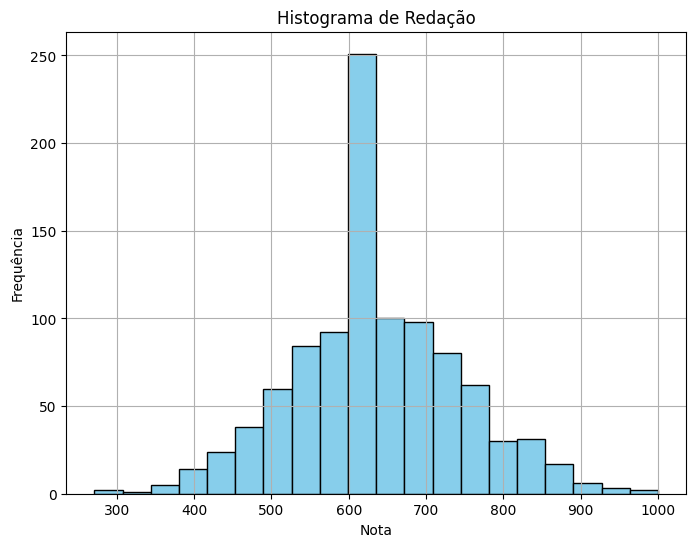

O histograma de Linguagens não é simétrico. A diferença entre a média e a mediana é maior que a tolerância.


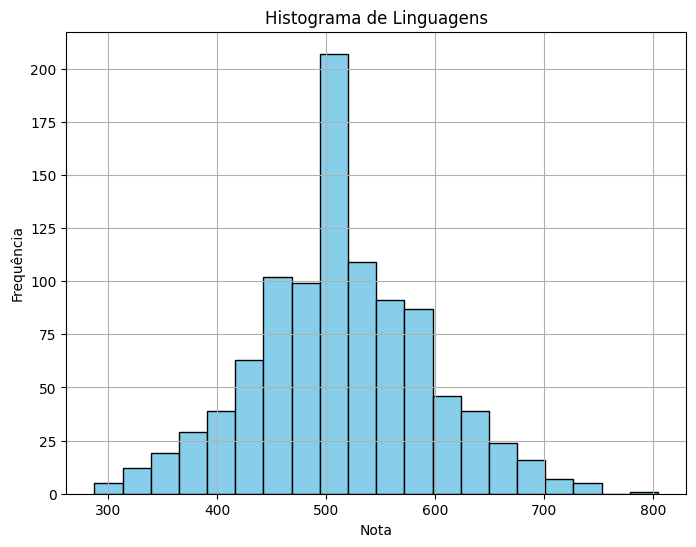

In [ ]:
def verificar_simetria(enem_df_clean, disciplina, tolerancia=0.1):
    # Calcular a média e a mediana para a disciplina
    media = enem_df_clean[disciplina].mean()
    mediana = enem_df_clean[disciplina].median()

    # Calcular a diferença entre a média e a mediana
    diferenca = abs(media - mediana)

    # Classificar a simetria
    if diferenca < tolerancia:
        print(f"O histograma de {disciplina} é simétrico.")
    else:
        print(f"O histograma de {disciplina} não é simétrico. A diferença entre a média e a mediana é maior que a tolerância.")

    # Plotar o histograma
    plt.figure(figsize=(8, 6))
    plt.hist(enem_df_clean[disciplina], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {disciplina}')
    plt.xlabel('Nota')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Verificar simetria para a disciplina de Redação
verificar_simetria(enem_df_clean, 'Redação')

# Verificar simetria para a disciplina de Linguagens
verificar_simetria(enem_df_clean, 'Linguagens')


7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

O histograma de Redação não é simétrico.


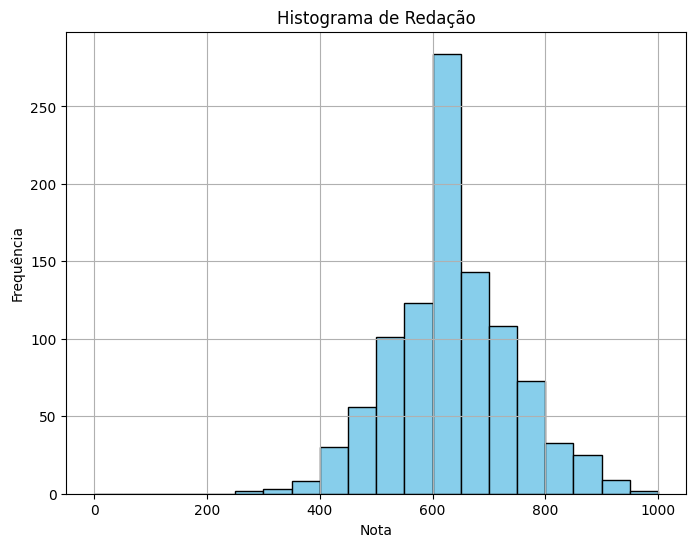

O histograma de Linguagens não é simétrico.


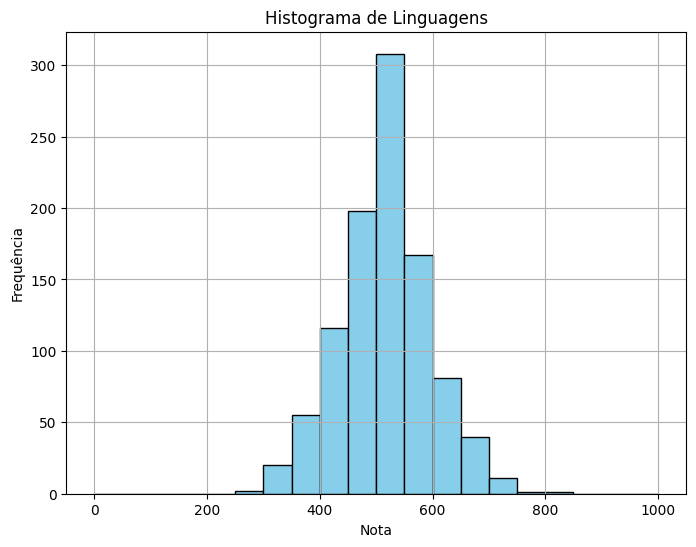

In [ ]:
def verificar_simetria(enem_df_clean, disciplina, tolerancia=0.1):
    # Calcular a média e a mediana para a disciplina
    media = enem_df_clean[disciplina].mean()
    mediana = enem_df_clean[disciplina].median()

    # Classificar a simetria
    if abs(media - mediana) < tolerancia:
        print(f"O histograma de {disciplina} é simétrico.")
    else:
        print(f"O histograma de {disciplina} não é simétrico.")

    # Plotar o histograma
    plt.figure(figsize=(8, 6))
    plt.hist(enem_df_clean[disciplina], bins=20, range=[0, 1000], color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {disciplina}')
    plt.xlabel('Nota')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Verificar simetria para a disciplina de Redação
verificar_simetria(enem_df_clean, 'Redação')

# Verificar simetria para a disciplina de Linguagens
verificar_simetria(enem_df_clean, 'Linguagens')

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

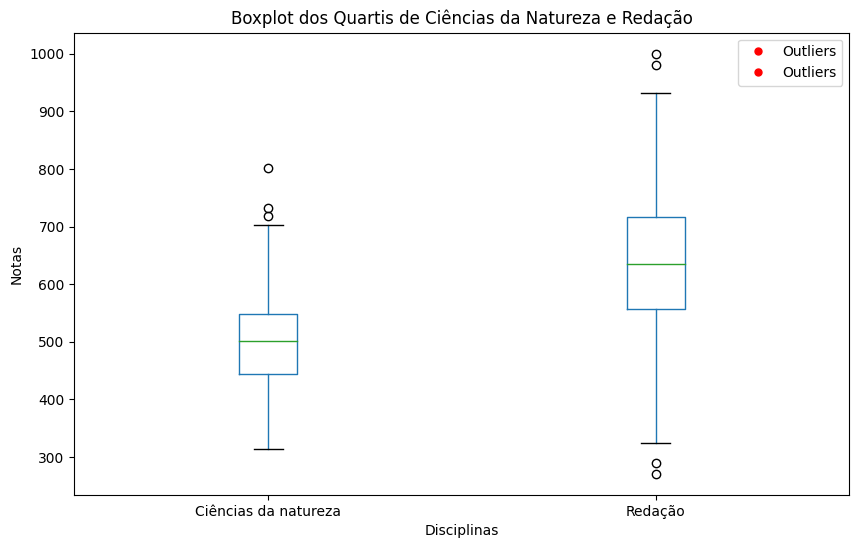

In [ ]:
# Selecionar as colunas relevantes (Ciências da Natureza e Redação)
colunas_selecionadas = ['Ciências da natureza', 'Redação']
df_selecionado = enem_df[colunas_selecionadas]

# Calcular os quartis usando o método IQR
Q1 = df_selecionado.quantile(0.25)
Q3 = df_selecionado.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Criar o boxplot
plt.figure(figsize=(10, 6))
df_selecionado.boxplot()
plt.title('Boxplot dos Quartis de Ciências da Natureza e Redação')
plt.ylabel('Notas')
plt.xlabel('Disciplinas')
plt.grid(False)

# Identificar e destacar os outliers
outliers = (df_selecionado < limite_inferior) | (df_selecionado > limite_superior)
outliers_values = df_selecionado[outliers].dropna()
plt.plot(outliers_values.index + 1, outliers_values.values, 'ro', markersize=5, label='Outliers')
plt.legend()

# Exibir o boxplot
plt.show()


9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
def remover_outliers_e_verificar(enem_df, colunas):
    # Excluir a coluna 'Sexo' das colunas para cálculo da média
    colunas_sem_sexo = [coluna for coluna in colunas if coluna != 'Sexo']

    # Calcular a média nacional antes da remoção de outliers
    media_nacional_antes = enem_df[colunas_sem_sexo].mean().round(2)

    # Identificar e remover outliers
    for coluna in colunas_sem_sexo:
        Q1 = enem_df[coluna].quantile(0.25)
        Q3 = enem_df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        enem_df = enem_df.loc[(enem_df[coluna] >= limite_inferior) & (enem_df[coluna] <= limite_superior)]

    # Calcular a média nacional depois da remoção de outliers
    media_nacional_depois = enem_df[colunas_sem_sexo].mean().round(2)

    # Verificar se houve uma alteração significativa na média nacional
    alteracao_percentual = ((media_nacional_depois - media_nacional_antes) / media_nacional_antes) * 100

    if abs(alteracao_percentual).any() > 5:
        print("A remoção dos outliers alterou a média nacional em mais de 5%.")
    else:
        print("A remoção dos outliers não alterou significativamente a média nacional.")

    # Verificar a média antes e depois
    print("Média nacional antes da remoção de outliers:", media_nacional_antes)
    print("Média nacional depois da remoção de outliers:", media_nacional_depois)


# Selecionar as colunas relevantes
colunas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

# Remover os outliers e verificar o impacto na média nacional
remover_outliers_e_verificar(enem_df, colunas)

A remoção dos outliers não alterou significativamente a média nacional.
Média nacional antes da remoção de outliers: Linguagens              514.52
Ciências humanas        527.04
Ciências da natureza    499.32
Matemática              535.97
Redação                 637.78
dtype: float64
Média nacional depois da remoção de outliers: Linguagens              517.18
Ciências humanas        527.19
Ciências da natureza    501.36
Matemática              535.32
Redação                 640.68
dtype: float64


10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
colunas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

# Calcular a média, moda e mediana para cada coluna
medidas_tendencia = {}
for coluna in colunas:
    media = enem_df[coluna].mean()
    moda = enem_df[coluna].mode().iloc[0]
    mediana = enem_df[coluna].median()
    medidas_tendencia[coluna] = {'Média': media, 'Moda': moda, 'Mediana': mediana}

# Substituir os valores nulos pelas três medidas de tendência central
for coluna in colunas:
    for medida in ['Média', 'Moda', 'Mediana']:
        df_temp = enem_df[coluna].fillna(medidas_tendencia[coluna][medida])
        enem_df[f"{coluna}_{medida}"] = df_temp

# Calcular a média geral e o desvio padrão para cada substituição
resultados = {}
for medida in ['Média', 'Moda', 'Mediana']:
    df_temp = enem_df[[f"{coluna}_{medida}" for coluna in colunas]]
    media_geral = df_temp.mean().mean()
    desvio_padrao = df_temp.stack().std()
    resultados[medida] = {'Média Geral': media_geral, 'Desvio Padrão': desvio_padrao}

# Encontrar a medida que altera menos a média geral e o desvio padrão
melhor_medida = min(resultados, key=lambda x: resultados[x]['Desvio Padrão'])

# Imprimir os resultados
print("Resultados:")
for medida, valores in resultados.items():
    print(f"{medida}: Média Geral = {valores['Média Geral']:.2f}, Desvio Padrão = {valores['Desvio Padrão']:.2f}")

print("\nMelhor medida:")
print(melhor_medida)

Resultados:
Média: Média Geral = 542.93, Desvio Padrão = 97.43
Moda: Média Geral = 515.13, Desvio Padrão = 123.36
Mediana: Média Geral = 542.83, Desvio Padrão = 97.35

Melhor medida:
Mediana
